In [9]:
import re
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cimcb as cb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from collections import Counter




import warnings
warnings.filterwarnings('ignore')

In [10]:
home ="/home/sjn/MetabComparisonBinaryML/notebooks/Project 3/"
data ='GSE68086_TEP_data_matrix.txt'
df   = pd.read_csv(home + data,  sep='\t')
df.head()

,Unnamed: 0,3-Breast-Her2-ampl,8-Breast-WT,10-Breast-Her2-ampl,Breast-100,15-Breast-Her2-ampl,16-Breast-WT,21-Breast-WT,33-Breast-Her2-ampl,42-Breast-Her2-ampl,...,MGH-NSCLC-L20-TR500,MGH-NSCLC-L22-TR462,MGH-NSCLC-L23-TR524,MGH-NSCLC-L25-TR480,MGH-NSCLC-L39-TR519,MGH-NSCLC-L40-TR520,MGH-NSCLC-L51-TR521,MGH-NSCLC-L58-TR525,MGH-NSCLC-L59-TR522,MGH-NSCLC-L65-TR523
0,ENSG00000000003,0,0,0,0,17,0,0,0,0,...,0,5,10,9,0,0,0,0,0,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,44,14,16,8,9,0,139,108,55,...,2,41,40,15,1,0,13,0,0,10
3,ENSG00000000457,26,1,14,0,4,20,1,26,24,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000000460,81,98,18,17,0,20,144,26,97,...,23,1,6,22,30,0,1,50,6,2


In [11]:
#Transform the input data
df = df.T
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df=df.reset_index()
df.head()

,index,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000273481,ENSG00000273483,ENSG00000273484,ENSG00000273485,ENSG00000273486,ENSG00000273487,ENSG00000273488,ENSG00000273489,ENSG00000273492,ENSG00000273493
0,3-Breast-Her2-ampl,0,0,44,26,81,171,34,83,0,...,0,0,0,0,1,0,0,1,4,0
1,8-Breast-WT,0,0,14,1,98,99,0,107,0,...,0,0,0,0,0,0,0,0,0,0
2,10-Breast-Her2-ampl,0,0,16,14,18,25,0,62,4,...,0,0,0,0,0,0,0,0,0,0
3,Breast-100,0,0,8,0,17,4,0,19,0,...,0,0,0,0,0,0,0,0,0,0
4,15-Breast-Her2-ampl,17,0,9,4,0,49,0,40,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#channging into binary outcomes, 0 means healthy person and 1 mean pan-cancer patient 
df['index'] = df['index'].replace(r'^(HD|Control).+', 0, regex=True)
df['index'] = df['index'].replace(r'^.+$', 1, regex=True)

In [13]:
df['index'].value_counts() 

1    231
0     54
Name: index, dtype: int64

In [14]:
X = df.drop("index",axis=1).astype('int')
y = df["index"].astype('int')


## Balancing the class using Oversampling technique

In [15]:
# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=1)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_resampled))

Original dataset shape Counter({1: 231, 0: 54})
Resample dataset shape Counter({1: 231, 0: 231})


In [34]:
len(X_resampled), len(y_resampled)

(462, 462)

Using Theano backend.
Using Theano backend.
Using Theano backend.
Using Theano backend.


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [17]:
X_train.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000273481,ENSG00000273483,ENSG00000273484,ENSG00000273485,ENSG00000273486,ENSG00000273487,ENSG00000273488,ENSG00000273489,ENSG00000273492,ENSG00000273493
325,0,0,27,3,13,171,0,21,0,5,...,0,0,0,0,0,0,0,0,0,0
98,3,0,9,10,0,26,0,10,1,2,...,0,0,0,0,0,0,0,0,0,0
433,0,0,32,7,10,81,0,38,14,10,...,0,0,0,0,1,0,0,0,0,0
322,8,0,6,8,49,70,0,59,0,6,...,0,0,0,0,0,0,0,0,0,0
343,0,0,17,0,10,94,0,68,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Genearte noise with same size as that of the data.
noise = np.random.normal(0, 20, X_train.shape) #  μ = 0(mean), σ = 2(standard deviation),size = same size as dataframe
noise1 = np.random.normal(0, 20, X_test.shape)
X_train = X_train + noise
X_test = X_test + noise1


In [19]:
y_test.value_counts(),y_train.value_counts()

(1    71
 0    68
 Name: index, dtype: int64,
 0    163
 1    160
 Name: index, dtype: int64)

In [20]:
#typecasting
y_train = y_train.astype("int")
y_test = y_test.astype("int")
X_train = X_train.astype("int")
X_test = X_test.astype("int")

## Hyperparameter optimization

In [21]:
param_dist = { 
    'max_features': ['sqrt'],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini'],
    'n_estimators': [100]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=1)

# Use random search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_dist, refit= True, cv=5)

# Fit the random search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt'], 'n_estimators': [100]})

In [22]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

best_rf.fit(X_train,y_train)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


RandomForestClassifier(max_depth=10, max_features='sqrt', random_state=1)

## Confusion matrix

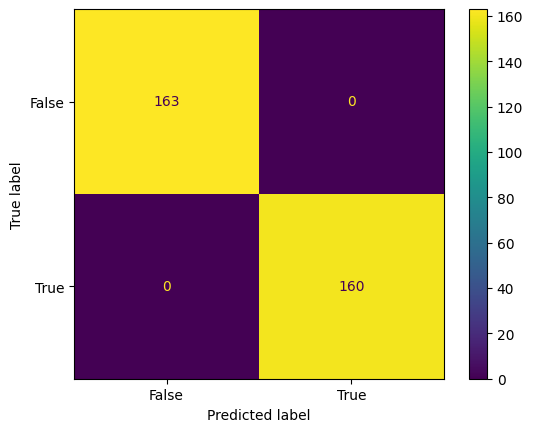

In [23]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_train)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True]).plot()

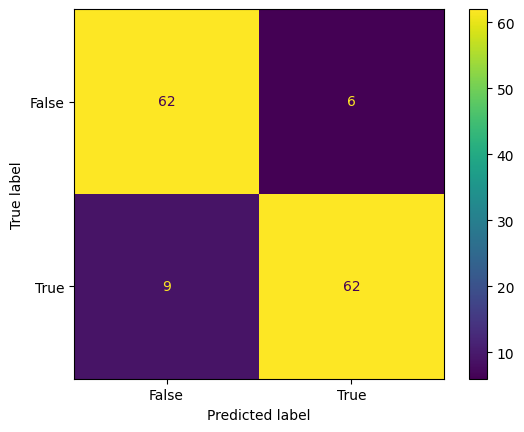

In [24]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True]).plot()

In [25]:
grid_predict = grid_search.predict(X_test)
print(classification_report(y_test, grid_predict)) 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        68
           1       0.91      0.87      0.89        71

    accuracy                           0.89       139
   macro avg       0.89      0.89      0.89       139
weighted avg       0.89      0.89      0.89       139



In [26]:
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


Accuracy: 0.8920863309352518


## Build model and evaluation

In [27]:
# Build Model
model = cb.model.RF(max_depth= 5,
                    max_features='sqrt',
                    criterion='gini',
                   n_estimators=100)
                     
YPredTrain = model.train(X_train, y_train)
YPredTest = model.test(X_test)

# Put YTrain and YPredTrain in a List
EvalTrain = [y_train, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [y_test, YPredTest]

# Evaluate Model (include Test Dataset
model.evaluate(testset=EvalTest) 

Loading BokehJS ...

## Boostrap evaluation

In [31]:
# Extract X Data
XBoot = X_resampled
YPredBoot = model.train(XBoot, y_resampled)

# Build Boostrap Models
bootmodel = cb.bootstrap.Per(model, bootnum=100) 
bootmodel.run()

# Boostrap Evaluate Model (include Test Dataset)
bootmodel.evaluate(trainset=EvalTrain, testset=EvalTest)   

Number of cores set to: 4


100%|█████████████████████████████████████████| 100/100 [04:07<00:00,  2.48s/it]


Time taken: 4.35 minutes with 4 cores


Loading BokehJS ...

In [32]:
# for important features:
important_feat = best_rf.feature_importances_
#get indices of those important features
idx = important_feat.argsort()
idx= idx[::-1][:18]
idx


array([ 4474, 11204, 10604, 12540,  5281, 30314,  3536, 11218,  9642,
       13301, 18281,  1821,  9270,  6821,  8360,  6178,  5941,  9976])

In [33]:
df_T = df.columns.values
r_seq = pd.DataFrame(df_T, columns=["Name_of_features"])
gene_list = r_seq.drop(0) 
#print(gene_list.head())
gene_list.loc[idx]

,Name_of_features
4474,ENSG00000115520
11204,ENSG00000163681
10604,ENSG00000160633
12540,ENSG00000168679
5281,ENSG00000122203
30314,ENSG00000229163
3536,ENSG00000108296
11218,ENSG00000163710
9642,ENSG00000152595
13301,ENSG00000171855
